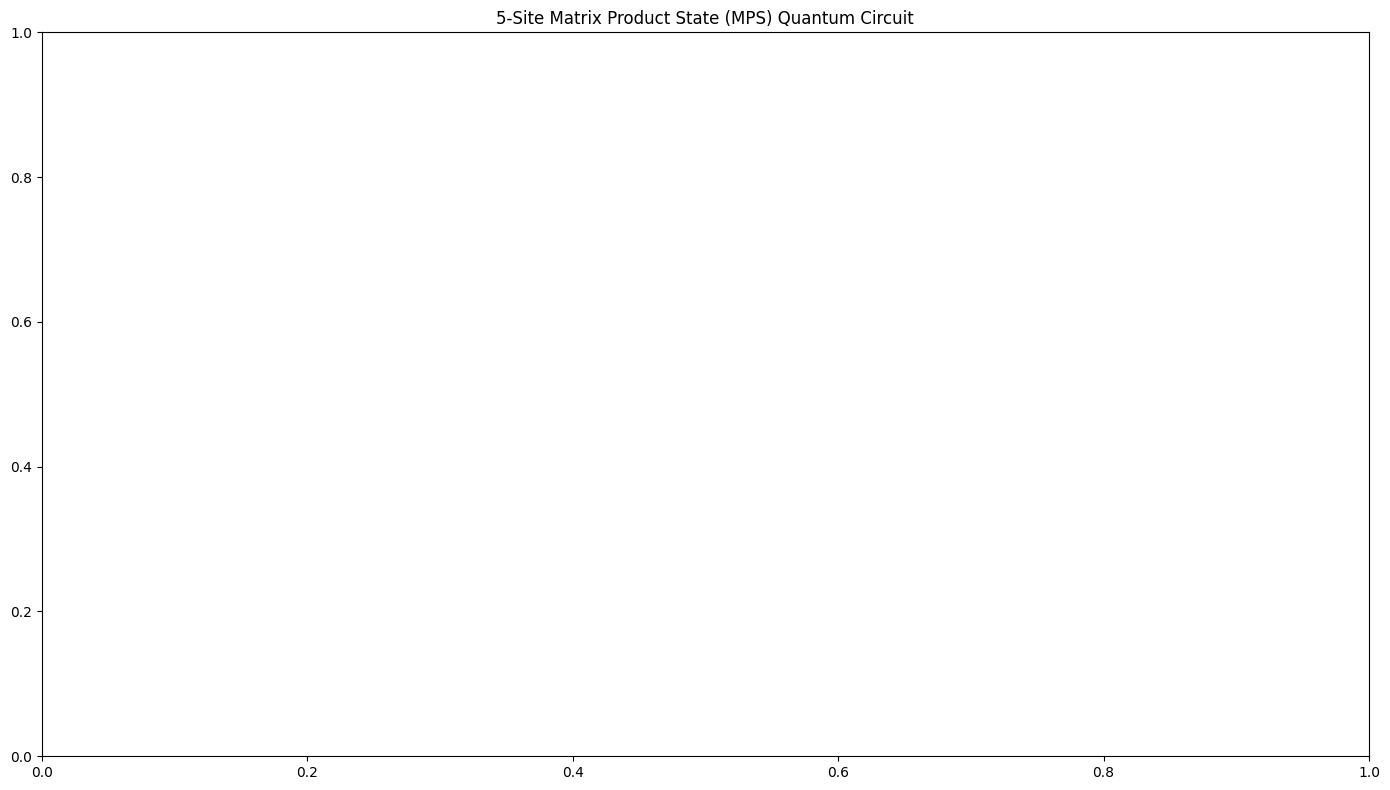

Circuit for 5-site MPS:
Total qubits: 9
Total classical bits: 5
Circuit depth: 12
Total number of operations: 28
Gate breakdown: {'reset': 9, 'cx': 8, 'ry': 5, 'measure': 5, 'barrier': 3, 'h': 1}


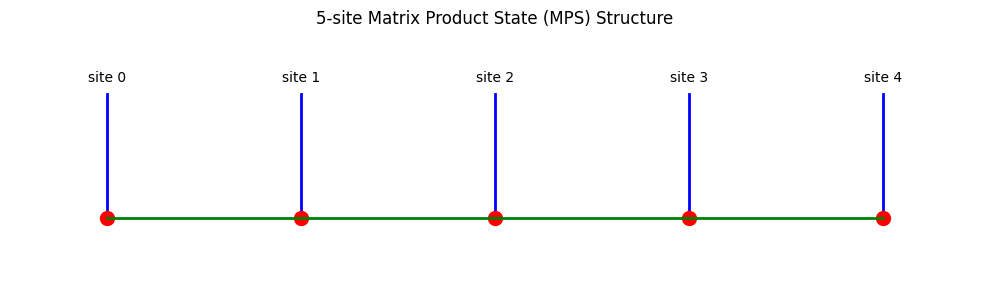

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt
from copy import deepcopy

def create_mps_circuit(n_sites=5, d=2, bond_dim=2):
    """
    Create a Matrix Product State (MPS) quantum circuit with n_sites.
    
    Args:
        n_sites (int): Number of sites in the MPS (default: 5)
        d (int): Physical dimension at each site (default: 2 for qubits)
        bond_dim (int): Bond dimension of the MPS (default: 2)
    
    Returns:
        QuantumCircuit: The MPS circuit
    """
    # Calculate required qubits
    # We need n_sites physical qubits and (n_sites-1) bond qubits for a bond dim of 2
    # For larger bond dimensions, we would need more bond qubits
    n_qubits = n_sites + (n_sites-1) * int(np.ceil(np.log2(bond_dim)))
    
    # Create quantum registers and circuit
    qr = QuantumRegister(n_qubits, 'q')
    cr = ClassicalRegister(n_sites, 'c')  # Classical register for measurements
    circuit = QuantumCircuit(qr, cr)
    
    # Initialize in |0> state
    circuit.reset(range(n_qubits))
    
    # Apply Hadamard to the first physical qubit to create superposition
    circuit.h(0)
    
    # Create the MPS structure
    # For each site, we'll create entanglement between physical and bond qubits
    for i in range(n_sites - 1):
        physical_qubit = i
        bond_qubit = n_sites + i
        next_physical_qubit = i + 1
        
        # Create entanglement between physical qubit and bond qubit
        circuit.cx(physical_qubit, bond_qubit)
        
        # Connect the bond qubit to the next physical qubit
        circuit.cx(bond_qubit, next_physical_qubit)
        
        # Add some rotation gates to make the state non-trivial
        circuit.ry(np.pi/4, physical_qubit)
        if i < n_sites - 2:  # Don't add barrier after the last operation
            circuit.barrier()
    
    # Add a final rotation to the last physical qubit
    circuit.ry(np.pi/4, n_sites - 1)
    
    # Measure all physical qubits
    for i in range(n_sites):
        circuit.measure(i, i)
    
    return circuit

# Create a 5-site MPS circuit
mps_circuit = create_mps_circuit(n_sites=5)

# Draw the circuit
fig = plt.figure(figsize=(14, 8))
mps_circuit.draw('mpl', fold=120, scale=0.7)
plt.title('5-Site Matrix Product State (MPS) Quantum Circuit')
plt.tight_layout()
plt.show()

# Let's also analyze the circuit properties
def analyze_mps_circuit(circuit, n_sites):
    print(f"Circuit for {n_sites}-site MPS:")
    print(f"Total qubits: {circuit.num_qubits}")
    print(f"Total classical bits: {circuit.num_clbits}")
    print(f"Circuit depth: {circuit.depth()}")
    print(f"Total number of operations: {circuit.size()}")
    
    # Count gates by type
    gate_counts = {}
    for gate in circuit.count_ops():
        gate_counts[gate] = circuit.count_ops()[gate]
    print("Gate breakdown:", gate_counts)

# Analyze our circuit
analyze_mps_circuit(mps_circuit, 5)

# Let's also visualize the tensor network structure of our MPS
def visualize_mps_structure(n_sites):
    """Create a simple visualization of the MPS tensor network structure"""
    fig, ax = plt.subplots(figsize=(10, 3))
    
    # Plot physical indices (vertical lines)
    for i in range(n_sites):
        ax.plot([i, i], [0, 1], 'b-', linewidth=2)
        ax.text(i, 1.1, f'site {i}', ha='center')
    
    # Plot tensors (circles)
    for i in range(n_sites):
        ax.plot(i, 0, 'ro', markersize=10)
    
    # Plot virtual bonds (horizontal lines)
    for i in range(n_sites-1):
        ax.plot([i, i+1], [0, 0], 'g-', linewidth=2)
    
    ax.set_xlim(-0.5, n_sites-0.5)
    ax.set_ylim(-0.5, 1.5)
    ax.axis('off')
    ax.set_title(f'{n_sites}-site Matrix Product State (MPS) Structure')
    plt.tight_layout()
    plt.show()

# Visualize the MPS structure
visualize_mps_structure(5)

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt
from copy import deepcopy

n_sites = 5
# Create quantum registers for physical and bond qubits
physical_qr = QuantumRegister(n_sites, 'p')
bond_qr = QuantumRegister(n_sites - 1, 'b')  # For bond dimension = 2
circuit = QuantumCircuit(physical_qr, bond_qr)
# Often start with a product state and build entanglement
# You might apply Hadamard gates to create superpositions
for i in range(n_sites):
    circuit.h(physical_qr[i])

# Connect each physical qubit to its bond qubit, then to the next physical qubit
for i in range(n_sites - 1):
    # Connect physical qubit i to bond qubit i
    circuit.cx(physical_qr[i], bond_qr[i])
    
    # Connect bond qubit i to next physical qubit
    circuit.cx(bond_qr[i], physical_qr[i+1])

# Add rotations or other operations to each site
for i in range(n_sites):
    circuit.ry(theta[i], physical_qr[i])  # Parameterized rotation

NameError: name 'theta' is not defined

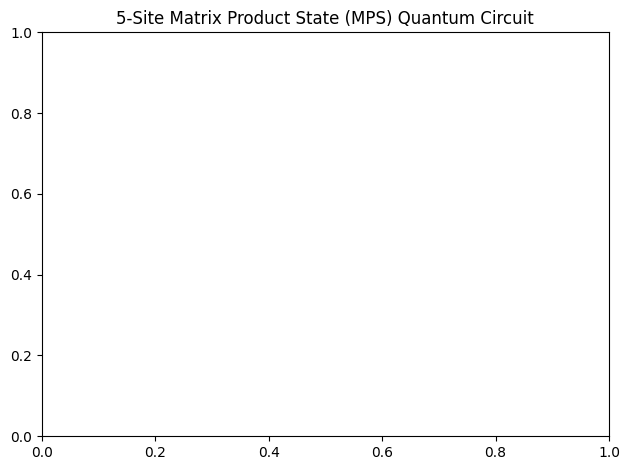

Circuit for 5-site MPS:
Total qubits: 9
Total classical bits: 5
Circuit depth: 11
Total number of operations: 23


In [3]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt
from copy import deepcopy

# Define number of sites
n_sites = 5

# Define rotation parameters (theta values for each site)
# Creating random angles for demonstration
theta = np.random.uniform(0, 2*np.pi, n_sites)

# Create quantum registers for physical and bond qubits
physical_qr = QuantumRegister(n_sites, 'p')
bond_qr = QuantumRegister(n_sites - 1, 'b')  # For bond dimension = 2
circuit = QuantumCircuit(physical_qr, bond_qr)

# Often start with a product state and build entanglement
# You might apply Hadamard gates to create superpositions
for i in range(n_sites):
    circuit.h(physical_qr[i])

# Connect each physical qubit to its bond qubit, then to the next physical qubit
for i in range(n_sites - 1):
    # Connect physical qubit i to bond qubit i
    circuit.cx(physical_qr[i], bond_qr[i])
    
    # Connect bond qubit i to next physical qubit
    circuit.cx(bond_qr[i], physical_qr[i+1])

# Add rotations or other operations to each site
for i in range(n_sites):
    circuit.ry(theta[i], physical_qr[i])  # Parameterized rotation

# Add measurement capabilities
cr = ClassicalRegister(n_sites, 'c')
circuit.add_register(cr)
for i in range(n_sites):
    circuit.measure(physical_qr[i], cr[i])

# Draw the circuit
circuit.draw('mpl', fold=120, scale=0.7)
plt.title('5-Site Matrix Product State (MPS) Quantum Circuit')
plt.tight_layout()
plt.show()

# Print circuit information
print(f"Circuit for {n_sites}-site MPS:")
print(f"Total qubits: {circuit.num_qubits}")
print(f"Total classical bits: {circuit.num_clbits}")
print(f"Circuit depth: {circuit.depth()}")
print(f"Total number of operations: {circuit.size()}")